In [67]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree

In [3]:
#Chargement des données  
spam=pd.read_csv("/users/2024/ds2/119008303/Documents/Statistiques en grande dimension et apprentissage/spam7.csv",sep=";")
spam

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [4]:
seed=10
spam_train,spam_test=train_test_split(spam,random_state=seed)

In [5]:
X_train,Y_train=spam_train.drop('yesno',axis=1),spam_train['yesno']
X_test,Y_test=spam_test.drop('yesno',axis=1),spam_test['yesno']
X_test

,crl.tot,dollar,bang,money,n000,make
1444,479,0.205,0.102,0.96,0.72,0.60
1538,46,0.000,0.326,0.00,0.00,0.00
3992,31,0.000,0.485,0.00,0.00,0.00
4099,26,0.000,0.165,0.00,0.00,0.00
4324,10,0.000,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...
1419,133,0.000,0.936,0.00,0.00,0.00
2688,13,0.000,0.000,0.00,0.00,0.00
3223,78,0.000,0.000,0.00,0.00,0.00
2745,178,0.000,0.000,0.00,0.00,0.00


In [6]:
# Classification avec DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
print(clf.classes_)

['n' 'y']


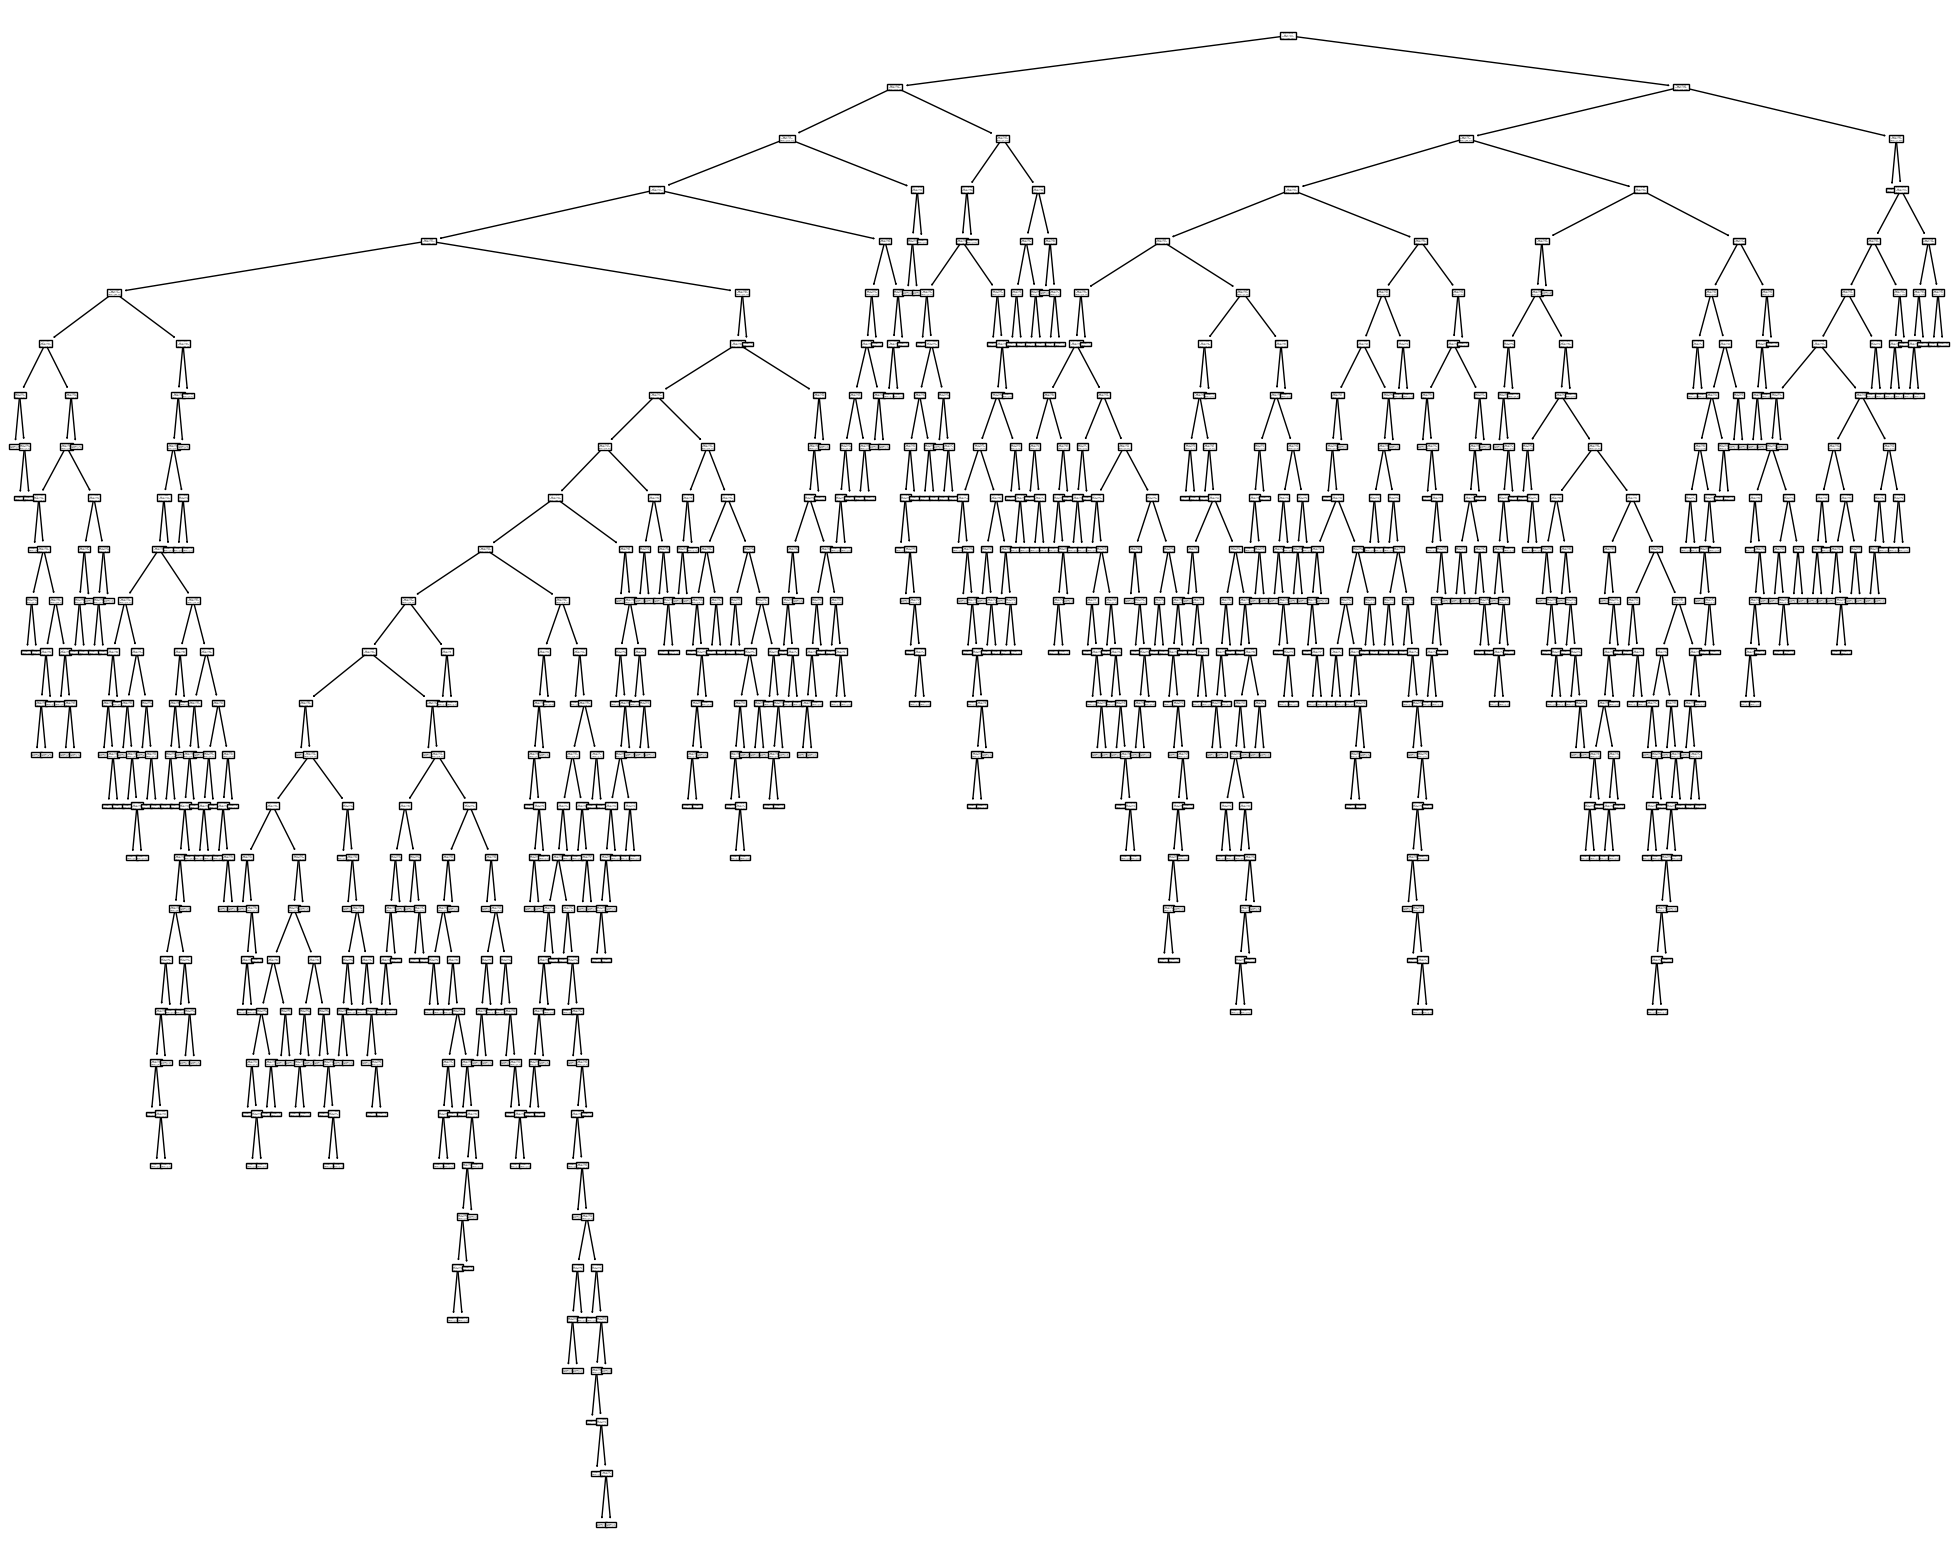

In [7]:
#Affichage de l'arbre
fig=plt.figure(figsize=(25,20))
_= plot_tree(clf)

In [56]:
X,Y=spam.drop('yesno',axis=1),spam['yesno']
Y=[1 if i=='y' else 0 for i in Y]
type(Y_train)

pandas.core.series.Series

In [114]:
def subs(A,B):  #renvoie A-B avec A,B des listes
    array1 = np.array(A)
    array2 = np.array(B)
    subtracted_array = np.subtract(array1, array2)
    end = list(subtracted_array)
    return end

In [96]:
#Algo gradient boosting:
def Gboosting(X,Y,lr,n,seed):  #lr=learning rate entre 0 et 1 ; Y composés d'entiers; le nombre d'itérations
    predtot=[]
    X_train,X_test=train_test_split(X,random_state=seed)
    Y_train,Y_test=train_test_split(Y,random_state=seed)
    m=sum(Y_train)/len(Y_train)
    print(m)
    xi,yi=X_train,[float(i) for i in Y_train]
    res=[k-m for k in yi]
    print(xi)
    for i in range(n):
        clf = DecisionTreeRegressor(random_state=0)
        clf.fit(xi, res)
        pred=[m+lr*k for k in clf.predict(xi)]
        #res=yi-pred est ce qui s'opère sur les 4 lignes ci-dessous
        array1 = np.array(yi)
        array2 = np.array(pred)
        subtracted_array = np.subtract(array1, array2)
        res = list(subtracted_array)
        predtot.append(res)
        yi=res
    predf=[m for i in Y_train]
    for k in predtot:
        predf=[predf[i]+lr*k[i] for i in range(len(Y_train))]
    return predf

In [98]:
Fin=Gboosting(X,Y,0.1,10,5)
Fin

0.39710144927536234
      crl.tot  dollar   bang  money  n000  make
4489       40   0.000  0.000   0.00   0.0  0.35
1135       75   0.118  0.653   0.36   0.0  0.00
2984       90   0.000  0.000   0.00   0.0  0.00
3049        6   0.000  0.000   0.00   0.0  0.00
3970       22   0.000  0.000   0.00   0.0  0.00
...       ...     ...    ...    ...   ...   ...
3046       45   0.000  0.111   0.00   0.0  0.00
1725      112   0.111  0.000   0.00   0.0  0.00
4079       20   0.000  0.000   0.00   0.0  0.00
2254        5   0.000  0.000   0.00   0.0  0.00
2915       38   0.000  0.000   0.00   0.0  0.00

[3450 rows x 6 columns]


[-1.2202823515149854,
 -0.6340929476049859,
 -1.2202823515149854,
 -1.2306276164172358,
 -1.2202823515149854,
 -1.2202823515149854,
 -1.4271876495599856,
 -0.6340929476049857,
 -1.2202823515149854,
 -1.2382741165623767,
 -1.2202823515149854,
 -0.6340929476049857,
 -1.2202823515149857,
 -1.2202823515149854,
 -1.2616634111239855,
 -0.6340929476049857,
 -0.6340929476049856,
 -0.6340929476049857,
 -1.2202823515149854,
 -1.2202823515149854,
 -1.4271876495599856,
 -1.2202823515149854,
 -1.2202823515149854,
 -0.2892507841966523,
 -0.6340929476049857,
 -0.2689659510549856,
 -1.2202823515149854,
 -1.2720086760262357,
 -1.2202823515149854,
 -0.6340929476049857,
 -1.2409728813194856,
 -0.6340929476049854,
 -1.2202823515149854,
 -0.6340929476049857,
 -1.2202823515149852,
 -1.358219216878319,
 -0.6340929476049857,
 -0.6340929476049852,
 -1.2256565151005698,
 -1.2202823515149854,
 -1.2382741165623767,
 -0.6340929476049852,
 -1.2202823515149854,
 -0.6340929476049852,
 -0.6340929476049857,
 -1.2202823

In [120]:
#Algo gradient boosting:
def Gboosting2(X,Y,n,seed):  #lr=learning rate entre 0 et 1 ; Y composés d'entiers; le nombre d'itérations
    X_train,X_test=train_test_split(X,random_state=seed)
    Y_train,Y_test=train_test_split(Y,random_state=seed)
    xi,yi=X_train,[int(i) for i in Y_train]
    clf1 = DecisionTreeClassifier(random_state=0)
    clf1.fit(xi,yi)
    res = subs(yi,clf1.predict(xi))
    print(sum(res))
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(xi, res)
    pred=[clf1.predict(xi)[k]+clf.predict(xi)[k] for k in range(len(Y_train))]
    for i in range(n-1):
        res=subs(yi,pred)
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(xi, res)
        pred=[pred[k]+clf.predict(xi)[k] for k in range(len(Y_train))]
    return pred

In [121]:
Fin2=Gboosting2(X,Y,80,20)
Yverif=[1 if i=='y' else 0 for i in Y_train]
V=[Fin2[i]==Yverif[i] for i in range(len(Fin2))]
print(V)

88
[True, False, False, True, True, True, True, False, False, True, False, False, False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, False, False, False, False, False, True, True, False, True, True, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, False, True, False, False, True, True, True, False, False, True, False, True, False, True, True, True, False, True, True, False, False, False, False, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, False, False, False, T

In [122]:
V2=[1 if i==True else 0 for i in V]
print(sum(V2)/len(V2))

0.5220289855072464
